In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('Salary_Data.csv')

In [26]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [33]:
# Descriptive Statistics

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
# Checking for duplicates

df[df.duplicated()]

,YearsExperience,Salary


In [35]:
df[df.duplicated()].shape

## Found 0 duplicates

(0, 2)

In [27]:
# Check the correlation

df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\sampa\AppData\Local\Temp\ipykernel_3768\4036524134.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


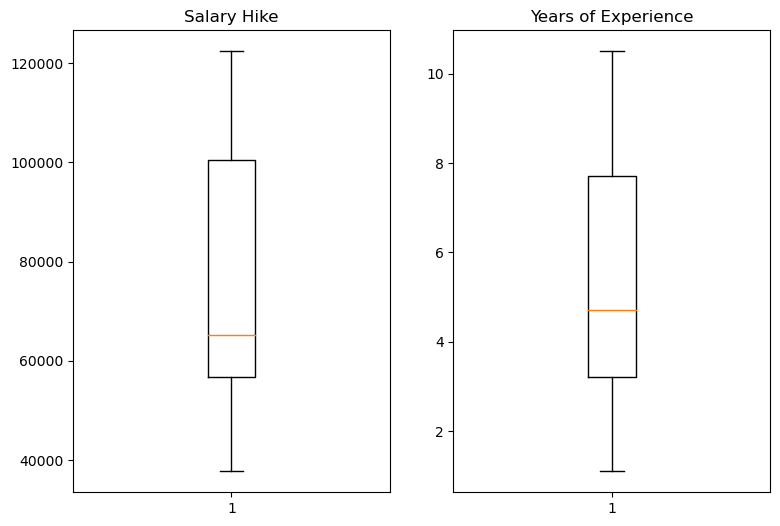

In [6]:
import matplotlib.pyplot as plt

plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

## There are no Outliers

In [28]:
# Build the base SLR Model.

import statsmodels.formula.api as smf
model = smf.ols("YearsExperience~Salary", data = df).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

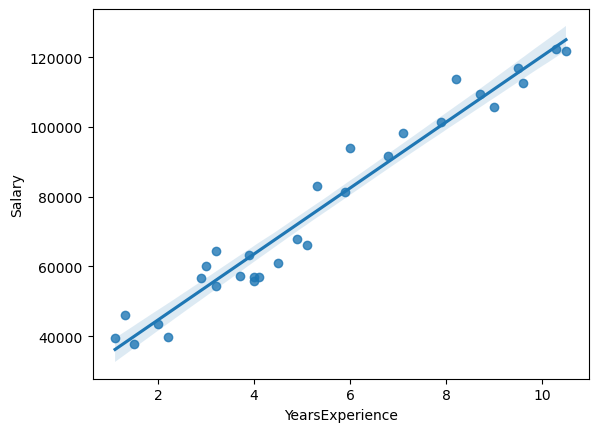

In [29]:
import seaborn as sns

sns.regplot(x='YearsExperience', y='Salary',data = df)

### The Regression plot shows that the Expierence has good correlation on Salary

In [7]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [8]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [9]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### The r2_score is good (0.95) but still lets try with other transformation and compare the r2_score 

In [10]:
# Square_Root Model

square_root_model = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        12:47:30   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Cube_Root Model

cube_root_model = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                        12:49:36   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Log Model

log_model = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        12:54:36   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparing the r2_score and Adj_r2_score we can conclude that the base model has best values for the same, Hence we can proceed with the Base Model.

## Residual Analysis

### Test for normality of Residuals(Q-Q Plot)

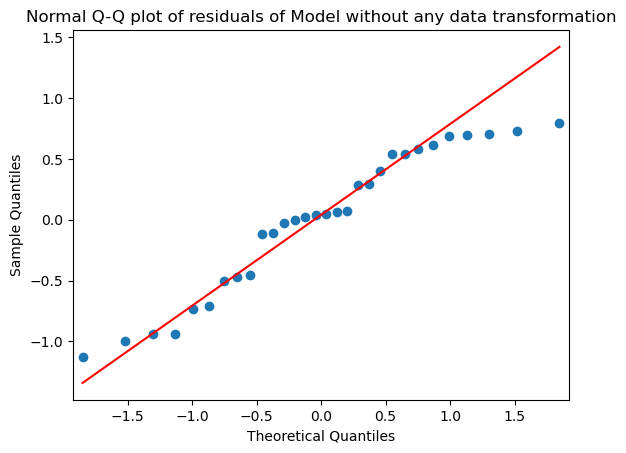

In [17]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

### The Residual follows normality

## Model Validation

### Comparing the RMSE of different models.

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
model_sqrt_pred_y =np.square(square_root_model.predict(df['YearsExperience']))
model_cbrt_pred_y =pow(cube_root_model.predict(df['YearsExperience']),3)
model_log_pred_y =np.exp(log_model.predict(df['YearsExperience']))

In [22]:
model_sqrt_rmse =np.sqrt(mean_squared_error(df['Salary'], model_sqrt_pred_y))
model_cbrt_rmse =np.sqrt(mean_squared_error(df['Salary'], model_cbrt_pred_y))
model_log_rmse =np.sqrt(mean_squared_error(df['Salary'], model_log_pred_y))

print('model=', np.sqrt(model.mse_resid)*10000,'\n' 'model_sqrt=', (model_sqrt_rmse/10),'\n' 'model_cbrt=', model_cbrt_rmse,'\n' 'model_log=', model_log_rmse)

model= 5991.950540452539 
model_sqrt= 7884.589980172005 
model_cbrt= 6232.815455835858 
model_log= 7219.716974372787


## The Base model is producing lower RMSE, that on an average there can be an Error of
## (+/-) 6000 US Dollars on Salary_Hike.